# Import Libraries

In [1147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Data Preparation

In [1148]:
# Load data
df = pd.read_csv('heart.csv')

In [1149]:
# Shape of the data
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (303, 14)


# Data Exploration

In [1150]:
# Checking for missing values and data types
print(df.info())
# Display summary statistics
df.describe()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chest_pain_type  303 non-null    int64  
 3   resting_bp       303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fbs              303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   max_hr           303 non-null    int64  
 8   exercise_angina  303 non-null    int64  
 9   old_st_peak      303 non-null    float64
 10  st_slope         303 non-null    int64  
 11  caa              303 non-null    int64  
 12  thall            303 non-null    int64  
 13  heart_attack     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,chest_pain_type,resting_bp,chol,fbs,restecg,max_hr,exercise_angina,old_st_peak,st_slope,caa,thall,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1151]:
# Preview of the first 5 rows of the data
df.head()

,age,sex,chest_pain_type,resting_bp,chol,fbs,restecg,max_hr,exercise_angina,old_st_peak,st_slope,caa,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1152]:
# Check for data types of each column
df.dtypes

age                  int64
sex                  int64
chest_pain_type      int64
resting_bp           int64
chol                 int64
fbs                  int64
restecg              int64
max_hr               int64
exercise_angina      int64
old_st_peak        float64
st_slope             int64
caa                  int64
thall                int64
heart_attack         int64
dtype: object

In [1153]:
# Seperating the columns in categorical and continuous
cat_cols = ['sex', 'chest_pain_type', 'fbs', 'restecg', 'exercise_angina', 'st_slope', 'caa', 'thall']
con_cols = ['age', 'resting_bp', 'chol', 'max_hr', 'old_st_peak']
target_col = ['output']

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'chest_pain_type', 'fbs', 'restecg', 'exercise_angina', 'st_slope', 'caa', 'thall']
The continuous cols are :  ['age', 'resting_bp', 'chol', 'max_hr', 'old_st_peak']
The target variable is :   ['output']


In [1154]:
# Summary Statistics of Continuous Features
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_st_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [1155]:
# Check for null values
df.isnull().sum()

age                0
sex                0
chest_pain_type    0
resting_bp         0
chol               0
fbs                0
restecg            0
max_hr             0
exercise_angina    0
old_st_peak        0
st_slope           0
caa                0
thall              0
heart_attack       0
dtype: int64

# Exploratory Data Analysis

### Univariate Analysis

Imbalances in some categorical variables are noted.

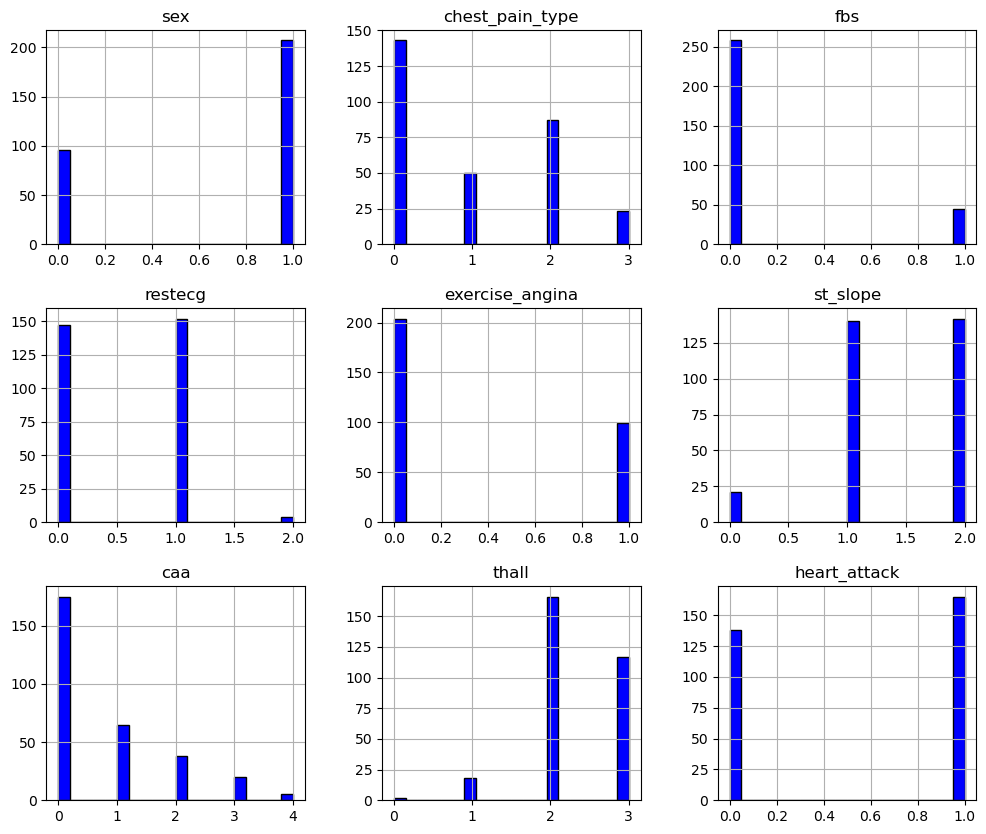

In [1156]:
df.drop(['age', 'resting_bp', 'chol', 'max_hr', 'old_st_peak'], axis=1).hist(figsize=(12,10), bins=20, color='blue', edgecolor='black')
plt.show()

Outliers are noted in some box-whisker plots, specifically resting blood pressure, cholesterol, max heart rate, and old ST peak.

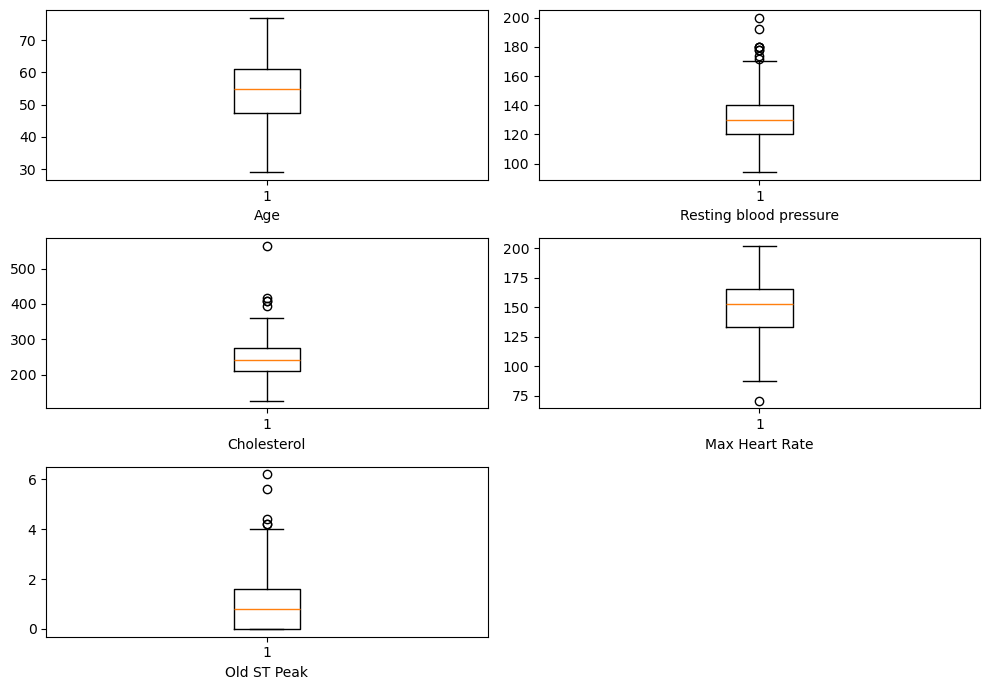

In [1157]:
# Plot Whisker plot for all continuous features
# ['age', 'resting_bp', 'chol', 'max_hr', 'old_st_peak']

fig = plt.figure(figsize = (10, 7))

plt.subplot(3, 2, 1)
plt.boxplot(df['age'])
plt.xlabel('Age')

plt.subplot(3, 2, 2)
plt.boxplot(df['resting_bp'])
plt.xlabel('Resting blood pressure')

plt.subplot(3, 2, 3)
plt.boxplot(df['chol'])
plt.xlabel('Cholesterol')

plt.subplot(3, 2, 4)
plt.boxplot(df['max_hr'])
plt.xlabel('Max Heart Rate')

plt.subplot(3, 2, 5)
plt.boxplot(df['old_st_peak'])
plt.xlabel('Old ST Peak')

plt.tight_layout()
plt.show()

### Bivariate Analysis

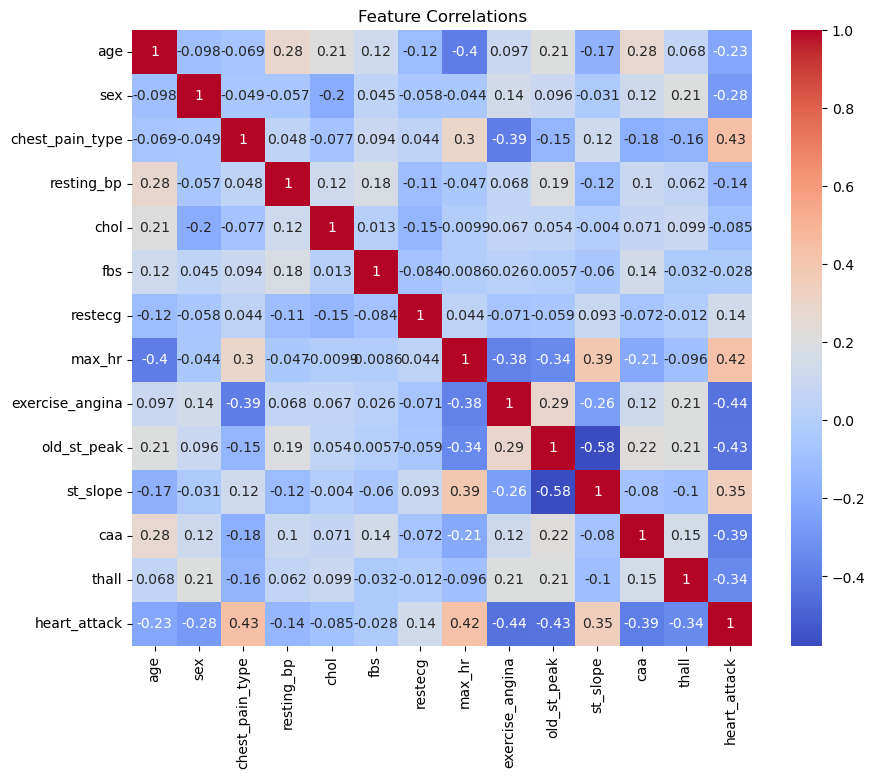

In [1158]:
# Correlation matrix and heatmap interpretation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Classification: K-Nearest Neighbour

In [1159]:
# Retrieve features (X) and target
X = df.drop(columns=['heart_attack'])
y = df['heart_attack']

In [1160]:
# Split data into training & testing sets
# Due to imbalanced classes, stratification is applied to avoid a skewed distribution in the train or test sets, which otherwise could lead to biased or misleading performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify= y)

In [1161]:
# Standardization (selected due to presence of outliers in the dataset)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1162]:
# Fit & Evaluate Model
k_values = [i for i in range(1, 201, 5)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

Text(0, 0.5, 'Accuracy score')

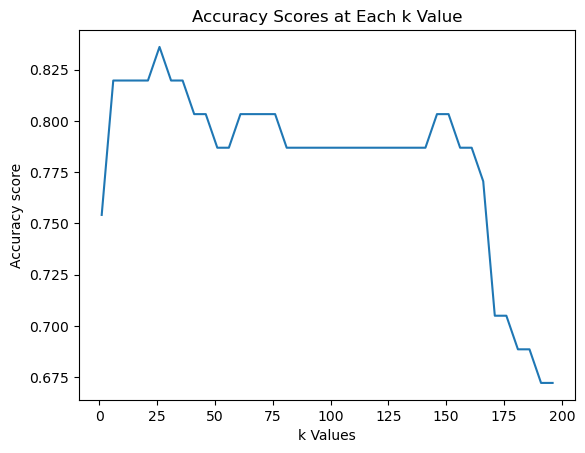

In [1163]:
# Visualization of accuracy score
plt.plot(k_values, scores)
plt.title('Accuracy Scores at Each k Value')
plt.xlabel('k Values')
plt.ylabel('Accuracy score')

In [1164]:
# Train model using the best k
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Interpretation of Performance Metrics
* **Precision**: The proportion of true positive predictions out of all predictions for a particular class. High precision means that when the model predicts a class, it’s often correct.

* **Recall (Sensitivity or True Positive Rate)**: The proportion of actual positive instances that the model correctly identified. High recall means the model is good at capturing all instances of a particular class.

* **F1-Score**: The harmonic mean of precision and recall, balancing the two metrics. It’s useful when you want a single metric to capture the balance between precision and recall. High F1-score means the model is performing well in both precision and recall.



In [1165]:
# Evaluate the model trained using best k - Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8360655737704918


In [1166]:
# Evaluate the model trained using best k - Classification Report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



However, it is noted that once the training set is changed (via changing random_state), the values of performance metrices fluctuate. This may be due to imbalances observed in distribution within some of the categorical variables. As such, cross-validation is employed.

# KNN Model with Hyperparameter Tuning (10-fold Cross-Validation)

In [1167]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 21)}

# Use GridSearchCV with stratified cross-validation
grid = GridSearchCV(knn, param_grid, cv=10)  # This will use stratified k-fold by default
grid.fit(X, y)

print("Best parameters:", grid.best_params_['n_neighbors'])
print(f"Best cross-validated score: {grid.best_score_}")

Best parameters: 7
Best cross-validated score: 0.6734408602150538


# Conclusion

### Feature Importance: 
* The heatmap revealed that certain features (e.g., `cholesterol`, `thalach` (maximum heart rate achieved)) had the strongest correlation with the target variable.
* These features are crucial for predictive modeling and should be prioritized in medical assessments.

### Model Performance:
The model's overall performance is strong, with an accuracy of 83.61% on the test set and a well-balanced precision and recall. However, the cross-validated score of 67.34% highlights that the model might not generalize as well across different data splits.

* The KNN model with 7 neighbors is the optimal choice based on cross-validation.
* The high recall for heart attack prediction (97%) suggests the model is good at identifying potential heart attack cases, which is crucial in medical applications where missing a diagnosis can have severe consequences.
* The relatively lower precision for heart attack cases (78%) indicates the possibility of false positives, which could lead to unnecessary further testing or interventions. This trade-off between recall and precision should be carefully evaluated based on the use case (e.g., in a high-stakes scenario, recall might be prioritized).

### Value for Stakeholders: 
* This model provides a quick and interpretable way to assess heart attack risk, aiding medical professionals in timely diagnosis and intervention, potentially saving lives.

# Next Steps

* **Improve Class Imbalance**: You noted imbalances in categorical variables. Addressing this imbalance may improve performance.
* **Gather more granular medical data**
* **Try Other Models**: While KNN performs reasonably well, it may be worth experimenting with more complex models such as Logistic Regression, Random Forests, or Gradient Boosting, which may provide better results on this type of problem.